# PCA for 5 Factor Solution (PopCensus)

In [1]:
import pandas as pd
import numpy as np
from support.pca_support import perform_pca

n_factors = 5
ipsatized_data = pd.read_csv('data/popc_ipsatised_results.csv', index_col=0)
results_file = 'intermediate/loadings_popc_5.csv'
#results_file = perform_pca('data/popc_ipsatised_results.csv', n_factors, 'intermediate/loadings_popc_5.csv')
loadings = pd.read_csv(results_file, index_col=0)
loadings.columns = [f'Factor{x}' for x in range(1, n_factors+1)]
print(f"loadings shape = {loadings.shape}")

loadings shape = (1702, 5)


In [2]:
explained_variance = np.sum(loadings**2, axis=0)
variances = [x/len(loadings)*100 for x in explained_variance]
print("variances: "+", ".join([f"{x:.2f}%" for x in variances])+ f", cumulative: {sum(variances):.2f}%")

variances: 4.84%, 4.43%, 4.16%, 4.11%, 2.00%, cumulative: 19.54%


In [3]:
from support.pca_support import get_highest_loadings
highest_loadings, pp = get_highest_loadings(30, loadings)
agent_loadings_df = pd.DataFrame(highest_loadings)
labels_factors = ['Introversion', 'Assertiveness', 'Dishonesty', 
                  'Unconventionality', 'Provincial']
pp.columns = [pp.columns[x]+'('+labels_factors[x]+')' for x in range(len(pp.columns))]
pp

,Factor1(Introversion),Factor2(Assertiveness),Factor3(Dishonesty),Factor4(Unconventionality),Factor5(Provincial)
0,ungregarious(0.79),unbold(-0.77),deceptive(0.88),strait-laced(-0.68),homespun(0.59)
1,distant(0.78),placid(-0.75),manipulative(0.88),overrigid(-0.62),folksy(0.57)
2,uncompanionable(0.77),mild(-0.75),sly(0.87),overscrupulous(-0.61),unliterary(0.57)
3,aloof(0.76),soft-spoken(-0.74),sneaky(0.86),conventional(-0.60),unscholarly(0.57)
4,standoffish(0.76),unobtrusive(-0.70),devious(0.86),free-living(0.59),unstudious(0.56)
5,detached(0.74),forceful(0.69),deceitful(0.84),unconventional(0.59),sophisticated(-0.54)
6,unpersonable(0.73),outspoken(0.66),double-faced(0.84),unpredictable(0.58),unbookish(0.52)
7,untalkative(0.72),overpatient(-0.65),underhanded(0.84),spontaneous(0.58),ultraintellectual(-0.50)
8,unaccessible(0.71),fierce(0.65),double-tongued(0.83),unconstrained(0.58),old-fashioned(0.50)
9,unapproachable(0.71),bullish(0.63),unscrupulous(0.82),hit-or-miss(0.57),visionary(-0.50)


In [4]:
from support.cronbach_alpha import calc_cronbachs_alpha as cronbach_alpha
alphas = []
for dim in highest_loadings:
    cols = highest_loadings[dim]
    df_ = ipsatized_data[cols.index]
    alpha = cronbach_alpha(df_)
    alphas.append(alpha)
print("Cronbach's Alpha: "+", ".join([f"{x:.2f}" for x in alphas]))

Cronbach's Alpha: 0.95, -0.56, 0.94, 0.15, -0.39


In [5]:
from support.data_support import load_hexaco_data
hexaco_data = load_hexaco_data()

In [6]:
from support.jaccard import calc_jaccard_with_hexaco
jaccards = calc_jaccard_with_hexaco(agent_loadings_df, hexaco_data)
highest_jaccards = list(zip(jaccards.index, jaccards.idxmax(axis=1), jaccards.max(axis=1)))
print("Highest Jaccard Similarities:")
[print(f" * {a} -> {b}, ({c:.3f})") for a, b, c in list(highest_jaccards)];

Highest Jaccard Similarities:
 * Factor1 -> Extraversion, (0.045)
 * Factor2 -> Agreeableness, (0.066)
 * Factor3 -> Honesty-Humility, (0.085)
 * Factor4 -> Openness, (0.032)
 * Factor5 -> Openness, (0.041)


In [7]:
"""def plot_jaccard(solution_name, data, color='Blues'):
    import seaborn as sns
    import matplotlib.pyplot as plt

    df_data = data.astype(float)
    df_data = df_data[['Honesty-Humility', 'Emotionality', 'Extraversion', 
                       'Agreeableness', 'Conscientiousness', 'Openness']]
    df_data.columns = ['H', 'E', 'X', 'A', 'C', 'O']
    df_data = df_data.T
    width = len(df_data.index) * 0.75
    plt.figure(figsize=(width, 4))
    ax = sns.heatmap(df_data,
                     cmap=sns.color_palette(color, as_cmap=True),
                     linewidths=0.5,
                     annot=True,
                     vmin=0, vmax=0.10) 
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
    ax.set_ylabel('Hexaco Dimensions\n')
    ax.set_xlabel(f'\n{solution_name}')
    ax.set_title(f'Weighted Jaccard Similarity for {solution_name} solution\n', fontsize=10)
    plt.show()"""

"def plot_jaccard(solution_name, data, color='Blues'):\n    import seaborn as sns\n    import matplotlib.pyplot as plt\n\n    df_data = data.astype(float)\n    df_data = df_data[['Honesty-Humility', 'Emotionality', 'Extraversion', \n                       'Agreeableness', 'Conscientiousness', 'Openness']]\n    df_data.columns = ['H', 'E', 'X', 'A', 'C', 'O']\n    df_data = df_data.T\n    width = len(df_data.index) * 0.75\n    plt.figure(figsize=(width, 4))\n    ax = sns.heatmap(df_data,\n                     cmap=sns.color_palette(color, as_cmap=True),\n                     linewidths=0.5,\n                     annot=True,\n                     vmin=0, vmax=0.10) \n    ax.set_yticklabels(ax.get_yticklabels(), rotation=0)\n    ax.set_ylabel('Hexaco Dimensions\n')\n    ax.set_xlabel(f'\n{solution_name}')\n    ax.set_title(f'Weighted Jaccard Similarity for {solution_name} solution\n', fontsize=10)\n    plt.show()"

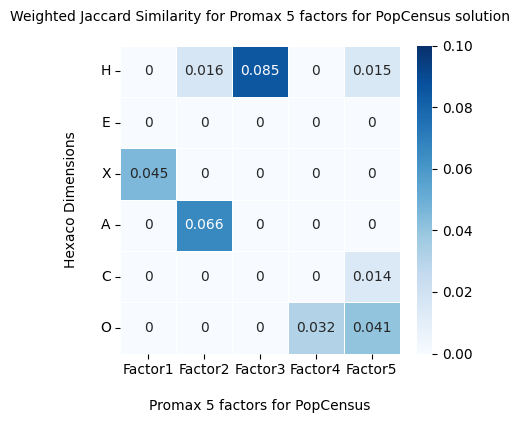

In [8]:
from support.plots import plot_jaccard
solution_name = 'Promax 5 factors for PopCensus'   
plot_jaccard(solution_name, jaccards)

In [9]:
from support.semantic_similarity import load_embedding_model, compute_similarity
model = load_embedding_model()

internal_sims_df = pd.DataFrame(columns='means stds'.split(), index=highest_loadings.keys())
for i, m in enumerate(highest_loadings.keys()):
    # reduce terms to only those we know are in the model...
    ats = [x for x in highest_loadings[m].index if x in model]
    sim, _ = compute_similarity(ats, model)
    print(f"Average similarity for {m}({labels_factors[i]}): {sim:.3f}")
    internal_sims_df.loc[m, 'means'] = sim
    internal_sims_df.loc[m, 'stds'] = 0

Average similarity for Factor1(Introversion): 0.498
Average similarity for Factor2(Assertiveness): 0.421
Average similarity for Factor3(Dishonesty): 0.536
Average similarity for Factor4(Unconventionality): 0.425
Average similarity for Factor5(Provincial): 0.448


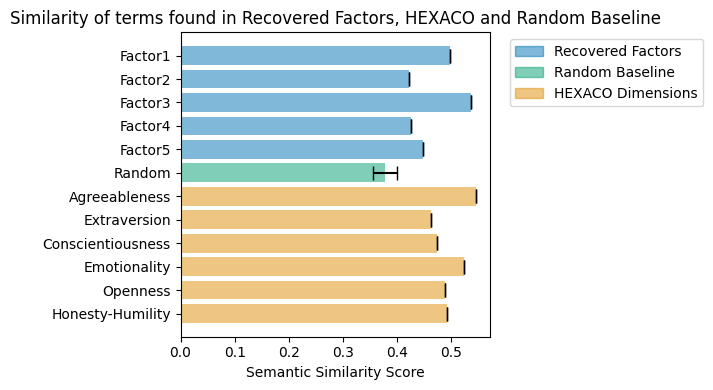

In [11]:
from support.plots import plot_internal_similarity_scores

# add mean and stdev for random adjectives (see random_similarity.ipynb)
internal_sims_df.loc['Random'] = [0.377694, 0.021589]

# add mean and stdev(always 0) for hexaco dimensions (see hexaco_similarity.ipynb)
internal_sims_df.loc['Agreeableness'] = [0.545, 0]
internal_sims_df.loc['Extraversion'] = [0.462, 0]
internal_sims_df.loc['Conscientiousness'] = [0.474, 0]
internal_sims_df.loc['Emotionality'] = [0.523, 0]
internal_sims_df.loc['Openness'] = [0.489, 0]
internal_sims_df.loc['Honesty-Humility'] = [0.492, 0]

plot_internal_similarity_scores(internal_sims_df, n_factors)

In [ ]:
from support.semantic_similarity import compute_similarity_between_sets
results = pd.DataFrame(columns=hexaco_data.keys(), index=highest_loadings.keys())
for factor in highest_loadings:
    factor_terms = [x for x in highest_loadings[factor].index]
    for dim in hexaco_data:
        dim_terms = [x for x in hexaco_data[dim].dropna().index]
        sim = compute_similarity_between_sets(factor_terms, dim_terms, model)
        results.loc[factor, dim] = sim
    print(f"Max similarity for {factor} = {results.loc[factor].max():.3f} ({results.loc[factor].idxmax()})")
results